# Summary

This project aims to detect fraudulent transactions in credit card data using machine learning techniques. It includes exploratory data analysis, data wrangling, building machine learning models, and testing the models.

### Chapter 1: Exploratory Data Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Values
- 1.3: Visual Analysis

### Chapter 2: Data Wrangling
- 2.1: Robust Scaler
- 2.2: Selecting Features by Correlation
- 2.3: Splitting Data

### Chapter 3: Building Machine Learning Models
- 3.1: Logistic Regression
- 3.2: Random Forest
- 3.3: Gradient Boosting
- 3.4: SVC (Support Vector Classifier)
- 3.5: Sequential Neural Network

### Chapter 4: Testing Model and Conclusion
- 4.1: Testing Model
- 4.2: Extra

# Chapter 1: Exploratory Data Analysis

In this section, we take a close look at our data to understand what it can tell us. 

This step is crucial for getting to know our data better before we dive into more advanced techniques.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1: Importing Data and First Look

Let's start by importing our data from a '.csv' file using the Pandas library, so we can view our data and perform an initial analysis on it.

In [4]:
# Reading the CSV file 'creditcard.csv' into a DataFrame named 'credit_df'
credit_df_raw = pd.read_csv('creditcard.csv')
# Displaying the content of the DataFrame
credit_df_raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Displaying information about the DataFrame 'credit_df', such as column names, data types, and others.
credit_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Generating descriptive statistics for the 'Amount' column of the DataFrame 'credit_df'
credit_df_raw['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

The 'Amount' column represents the value of each transaction in a credit card dataset.

From the summary statistics provided:

- The average transaction amount is approximately $88.35, indicating that, on average, transactions tend to be relatively low in value.
- The standard deviation is relatively high at $250.12, suggesting a wide variability in transaction amounts.
- The minimum transaction amount is $0, which may indicate transactions with no monetary value.
- 75% of transactions have amounts equal to or less than $77.17, while the maximum transaction amount is $25,691.16, indicating a significant disparity between the majority of transactions and the highest-value transactions.

### 1.2: Checking Values

We will use the 'isnull' and 'sum' methods to sum up the null values in each column.

And then we will check the values of 'Class' to see how they are distributed.

In [7]:
# checking the number of missing values in each column
credit_df_raw.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in this dataset.

In [8]:
# Counting the occurrences of each unique value in the 'Class' column of the DataFrame 'credit_df'
credit_df_raw['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced.

- 0 -> Normal Transaction

- 1 -> fraudulent transaction

### 1.3: Visual Analysis

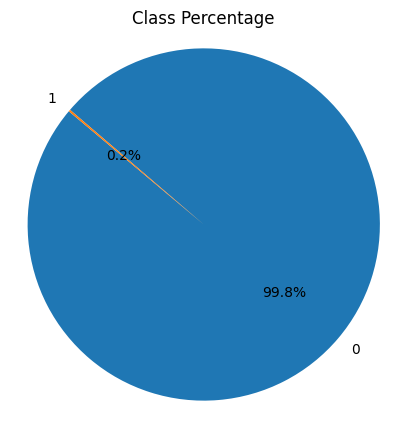

In [9]:
# Calculate the percentage of each class
class_percentages = (credit_df_raw['Class'].value_counts() / len(credit_df_raw)) * 100

# Create the pie chart
plt.figure(figsize=(5, 5))  # Define the figure size
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Percentage')  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the plot as an image file (e.g., PNG)
plt.savefig('class_percentage.png', bbox_inches='tight')

plt.show()

Only 0.2% of the dataset consists of fraudulent transactions.

Blue lines in the next graphic are representing 'Normal' transactions and red lines are representing the 'Fraud' values.

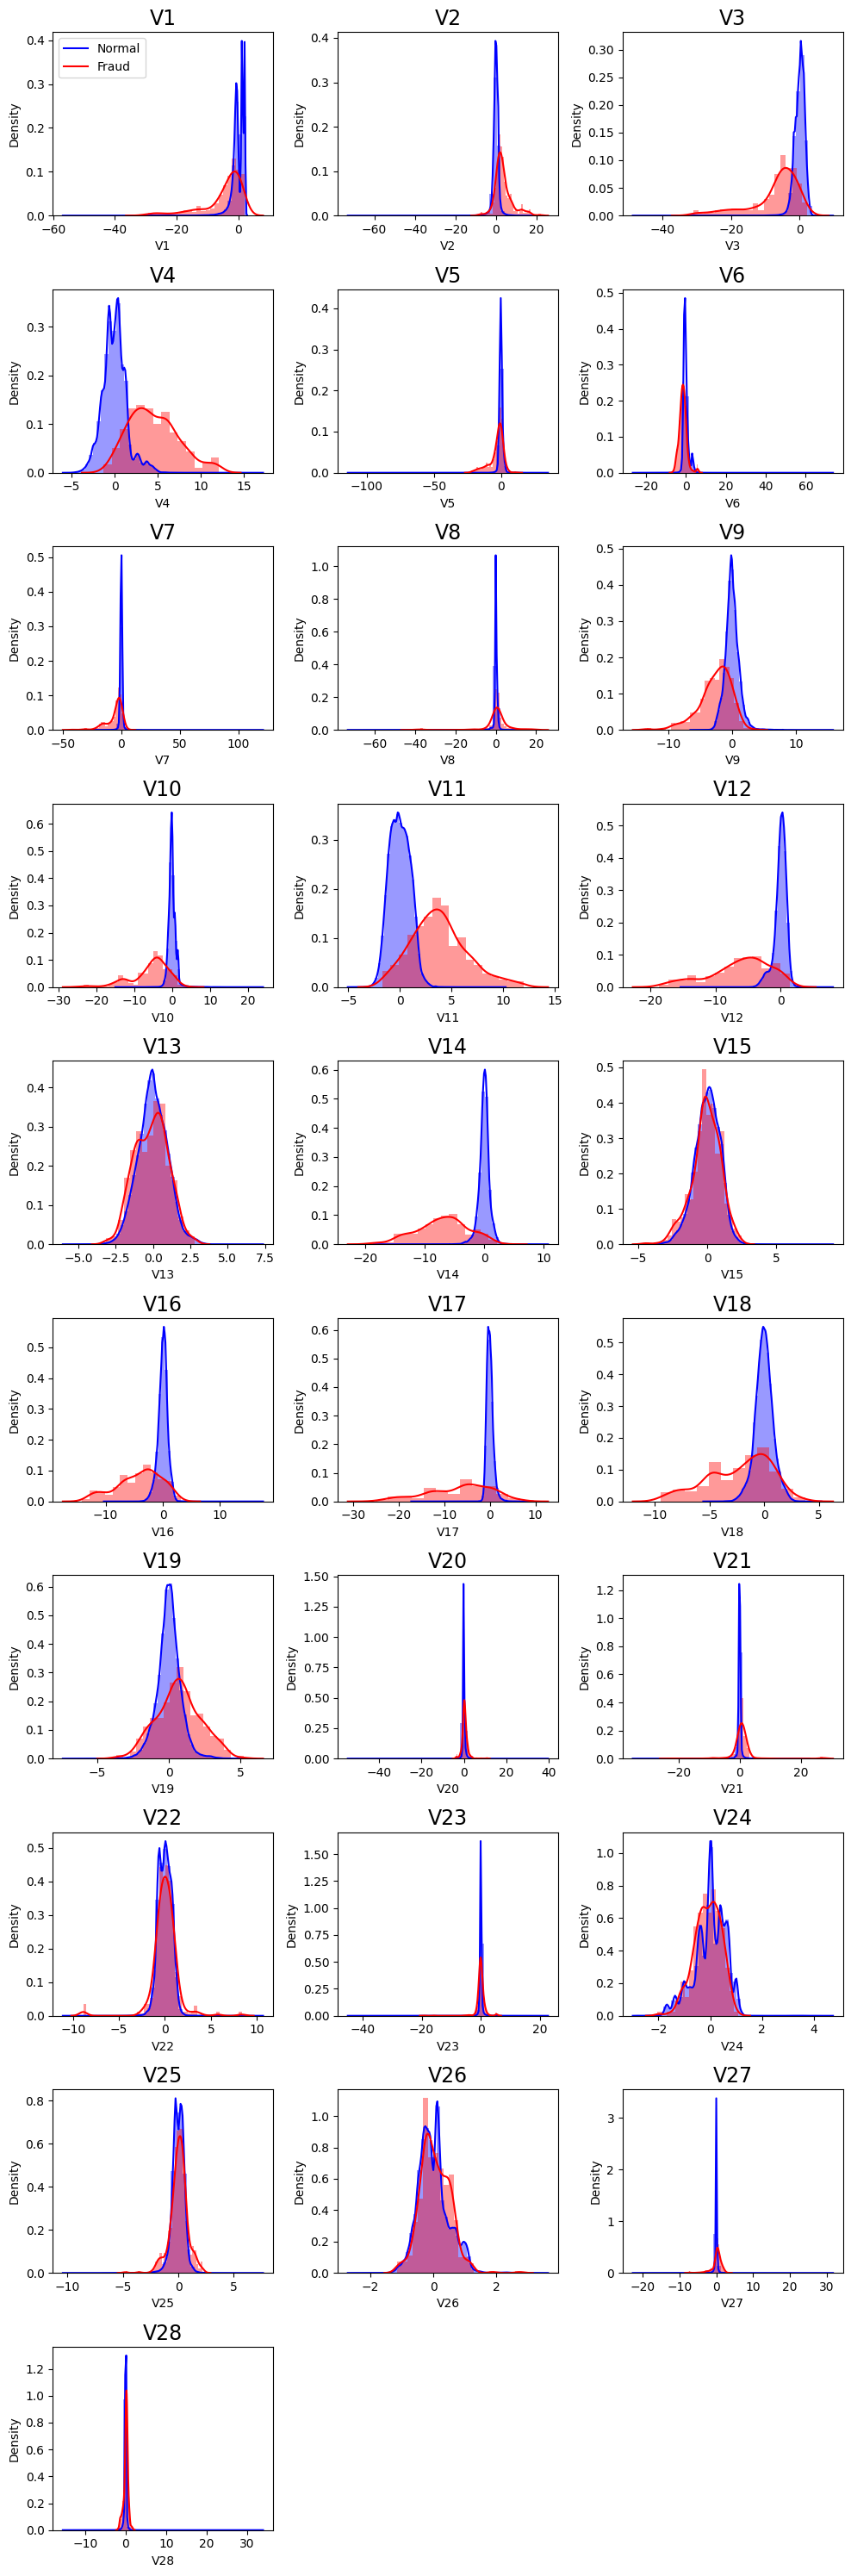

In [10]:
# Remove the columns 'Time', 'Amount', and 'Class' from the list of columns.
cols_to_exclude = ['Time', 'Amount', 'Class']
cols = [col for col in credit_df_raw.columns if col not in cols_to_exclude]

normal_records = credit_df_raw['Class'] == 0
fraud_records = credit_df_raw['Class'] == 1

num_cols = len(cols)  # Get the number of columns

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Round up the division
plt.figure(figsize=(10, 3 * num_rows))  # Adjust the figure size based on the number of rows

for n, col in enumerate(cols, start=1):  # Start enumerate from 1
    plt.subplot(num_rows, 3, n)
    sns.distplot(credit_df_raw[col][normal_records], color='blue')  # Plot normal data
    sns.distplot(credit_df_raw[col][fraud_records], color='red')  # Plot fraud data
    plt.title(col, fontsize=17)
    if n == 1:  # Add legend only for the first subplot
        plt.legend(labels=['Normal', 'Fraud'])

plt.tight_layout()  # Adjust subplot parameters to give specified padding

# Save the plot as an image file (e.g., PNG)
plt.savefig('distplot.png', bbox_inches='tight')

plt.show()

As we can observe, the distribution of 'Fraud' values differs significantly from that of 'Normal' values across certain features.

# Chapter 2: Data Wrangling

In [11]:
# Creating a copy of credit_df_raw and naming it credit_df
credit_df = credit_df_raw.copy()

### 2.1: Robust Scaler

- The Robust Scaler is a method used in data preprocessing to scale features by removing the median and scaling data according to the interquartile range (IQR). Unlike standard scaling methods, such as Min-Max scaling or Z-score normalization, the Robust Scaler is less sensitive to outliers in the data. It works by subtracting the median of the data and then dividing by the IQR, which is the difference between the 75th and 25th percentiles of the data. This makes it robust to outliers because it uses the median rather than the mean and scales the data based on the spread of the middle 50% of the data rather than the overall range. This makes it particularly useful when dealing with datasets that contain outliers or have non-normal distributions.

In [12]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Define the numerical columns (excluding 'Time' and 'Amount')
num_cols = [col for col in credit_df.columns if col not in ['Time', 'Amount']]

# Define the pipeline steps for preprocessing
preprocessor = ColumnTransformer([
    ('robust_scaler', RobustScaler(), ['Amount']),         # Apply RobustScaler to the 'Amount' column
    ('minmax_scaler', MinMaxScaler(), ['Time']),          # Apply MinMaxScaler to the 'Time' column
    ('passthrough', 'passthrough', num_cols)               # Passthrough for other numerical columns
])

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the pipeline to the data
credit_df = pipeline.fit_transform(credit_df)
# Convert the processed data back to a DataFrame
credit_df = pd.DataFrame(credit_df, columns=['Amount', 'Time'] + num_cols)
# Display the first few rows of the processed DataFrame
credit_df.head()

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.269825,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.983721,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.418291,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.670579,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


### 2.2: Selecting Features by Correlation

In [14]:
# Calculating the correlation matrix for the balanced dataset
correlation_matrix = credit_df.corr()

# Sorting the correlations of each feature with the target variable 'Class' in descending order
target_correlations = correlation_matrix['Class'].sort_values(ascending=False)
print(target_correlations)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [15]:
# Setting the correlation threshold below which features will be removed
correlation_limit = 0.05  # You can adjust this value as needed

# Selecting columns with correlations lower than the defined limit
columns_to_remove = target_correlations[abs(target_correlations) < correlation_limit].index

# Removing selected columns from the balanced dataset
credit_df = credit_df.drop(columns=columns_to_remove)
# Printing the columns that were removed
print("Columns removed:")
print(columns_to_remove)

Columns removed:
Index(['V21', 'V19', 'V20', 'V8', 'V27', 'V28', 'Amount', 'V26', 'V25', 'V22',
       'V23', 'V15', 'V13', 'V24', 'Time', 'V6'],
      dtype='object')


In [16]:
# Printing the new dataset after removing columns based on correlation threshold
print("\nNovo conjunto de dados:")
credit_df.head()


Novo conjunto de dados:


,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.0


In [17]:
# # Save churn_df to an csv file
# credit_df.to_csv('Creditcard clean data.csv', index=False)

# # Save churn_df to an excel file
# credit_df.to_excel('Creditcard clean data.xlsx', index=False)

### 2.3: Splitting Data

In this section, we've created unbalanced training, validation, and test sets that will be used to build the SMOTE model, as well to validate and test all models.

Creating unbalanced sets

- Normal

In [18]:
from sklearn.model_selection import train_test_split

# Extracting features (X) and target (y) from the DataFrame
X = credit_df.drop(columns=['Class'])
y = credit_df['Class']

# Splitting the data into training and test sets with stratification
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Splitting again to obtain the validation set

# Displaying the shapes of the resulting datasets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (170883, 14) (170883,)
Shape of validation set: (56962, 14) (56962,)
Shape of test set: (56962, 14) (56962,)


In [19]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts(), pd.Series(y_test).value_counts()

(Class
 0.0    170581
 1.0       302
 Name: count, dtype: int64,
 Class
 0.0    56870
 1.0       92
 Name: count, dtype: int64,
 Class
 0.0    56864
 1.0       98
 Name: count, dtype: int64)

- Undersampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Create the sampler for undersampling
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling only to the training set
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (604, 14) (604,)


In [21]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_us).value_counts()

Class
0.0    302
1.0    302
Name: count, dtype: int64

- SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_smote).value_counts()

Class
0.0    170581
1.0    170581
Name: count, dtype: int64

# Chapter 3: Building Machine Learning Models

### 3.1: Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate logistic regression model
logistic_model = LogisticRegression(random_state=42)

- Standard Model

In [25]:
# Train the logistic regression model using the imbalanced training data
logistic_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.81      0.55      0.66        92

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



- Undersampling Model

In [26]:
# Train the logistic regression model using the balanced training data
logistic_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98     56870
       Fraud       0.04      0.86      0.07        92

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.96      0.98     56962



### 3.2: Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
rf = RandomForestClassifier(max_depth=1, n_jobs=-1, random_state=42)

- Standard Model

In [28]:
# Train the Random Forest classifier using the imbalanced training data
rf.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.84      0.39      0.53        92

    accuracy                           1.00     56962
   macro avg       0.92      0.70      0.77     56962
weighted avg       1.00      1.00      1.00     56962



- SMOTE Model

In [29]:
# Train the Random Forest classifier using the resampled training data
rf.fit(X_train_smote, y_train_smote)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.28      0.76      0.41        92

    accuracy                           1.00     56962
   macro avg       0.64      0.88      0.71     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Define the hyperparameters you want to adjust, including the original hyperparameters
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'random_state': [42],
# }

# # Create a Random Forest classifier
# rf = RandomForestClassifier()

# # Create a GridSearchCV object
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)

# # Train the model using the imbalanced dataset
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Generate the classification report for the original validation set
# print("Classification Report:")
# print(classification_report(y_val, grid_search.best_estimator_.predict(X_val), target_names=['Not Fraud', 'Fraud']))

### 3.3: Gradient Boosting 

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Gradient Boosting classifier with specified hyperparameters
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=42)

- Standard Model

In [32]:
# Train the Gradient Boosting classifier using the imbalanced training data
gbc.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.29      0.22      0.25        92

    accuracy                           1.00     56962
   macro avg       0.65      0.61      0.62     56962
weighted avg       1.00      1.00      1.00     56962



- Undersampling Model

In [33]:
# Train the Gradient Boosting classifier using the balanced training data
gbc.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97     56870
       Fraud       0.02      0.86      0.05        92

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



- SMOTE Model

In [34]:
# Train the Gradient Boosting classifier using the resampled training data
gbc.fit(X_train_smote, y_train_smote)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99     56870
       Fraud       0.10      0.83      0.18        92

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



### 3.4: SVC (Support Vector Classifier)

In [35]:
from sklearn.svm import LinearSVC

# Instantiate Support Vector Classifier 
svc = LinearSVC(class_weight='balanced', random_state=42)

- Standard Model

In [36]:
# Train the Support Vector Classifier using the imbalanced training data
svc.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, svc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56870
       Fraud       0.67      0.72      0.69        92

    accuracy                           1.00     56962
   macro avg       0.83      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### 3.5: Sequential Neural Network 

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Building the neural network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compiling the model
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model_nn.fit(X_train_us, y_train_us, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Evaluating the model
evaluation = model_nn.evaluate(X_val, y_val)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9705 - loss: 0.1117
Loss: 0.11309996247291565
Accuracy: 0.9712790846824646


In [38]:
# Model predictions for the validation set
y_pred_prob = model_nn.predict(X_val)

# Thresholding probabilities to obtain predicted classes
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the classification report
print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     56870
       Fraud       0.05      0.85      0.09        92

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.54     56962
weighted avg       1.00      0.97      0.98     56962



# Chapter 4: Testing Models and Conclusion


Let's now assess the performance of the most promising models using the test set. The models under consideration are Random Forest using a dataset with SMOTE and SVC using the standard dataset.

### 4.1: Testing Models

In [39]:
import pickle

# Train the Random Forest classifier using the resampled training data
rf.fit(X_train_smote, y_train_smote)

# # Save the trained model to a file
# with open('random_forest_smote_model.pkl', 'wb') as file:
#     pickle.dump(rf, file)

# Generate classification report for the original imbalanced test set
print(classification_report(y_test, rf.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.30      0.88      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.94      0.72     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
# Train the Support Vector Classifier using the imbalanced training data
svc.fit(X_train, y_train)

# # Save the trained model to a file
# with open('svc_model.pkl', 'wb') as file:
#     pickle.dump(svc, file)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_test, svc.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.70      0.85      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



The SVC model exhibited superior performance as indicated by the following metrics:

Precision:
- Not Fraud class: 100%
- Fraud class: 70%

Recall:
- Not Fraud class: 100%
- Fraud class: 85%

This outcome suggests that the SVC model achieved perfect precision and recall for the Not Fraud class, meaning it correctly identified all instances of non-fraudulent transactions without misclassifying any. For the Fraud class, although the precision is lower (70%), the recall is relatively high (85%), indicating that the model correctly identified a significant portion of fraudulent transactions while still minimizing false positives.

The high recall for the Fraud class is particularly crucial in fraud detection scenarios, as it implies that the model effectively captures a large proportion of actual fraudulent transactions, reducing the risk of overlooking fraudulent activity. However, the precision for the Fraud class suggests that there might be some false positives, where legitimate transactions are incorrectly flagged as fraudulent.

### 4.2: EXTRA

In [42]:
# Train the Gradient Boosting classifier using the balanced training data
gbc.fit(X_train_us, y_train_us)

# # Save the trained model to a file
# with open('gbc_undersampling_model.pkl', 'wb') as file:
#     pickle.dump(gbc, file)


# Generate classification report for the original imbalanced validation set
print(classification_report(y_test, gbc.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.94      0.97     56864
       Fraud       0.03      0.93      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.94      0.97     56962




This model is capable of detecting 93% of frauds, but it comes with a high cost. The fraud precision is only 3%, meaning users will receive many false alerts, compromising the relevance of this anomaly detection system.

<!-- ### 4.5: Conclusion
The normal model proved to be the most successful in detecting fraudulent transactions in this extremely unbalanced dataset. With a recall rate of 82%, identifying the majority of fraudulent transactions. Although the precision of 77% indicates the presence of false alarms, it is noteworthy that the normal model is achieving promising results, considering the challenge posed by the data imbalance. 

These results underscore the effectiveness of the Gradient Boosting algorithm in handling imbalanced datasets and highlight its potential in early detection and prevention of fraudulent activities in financial transactions. -->